In [12]:
#AI-TECHGYM-2-8-A-2
#特徴量エンジニアリング

#インポート
import pandas as pd
import os
import urllib.request

#ファイルがなければダウンロードする
title = "FIFA_data.csv"
if not os.path.exists(title):
    print(title + " DOWNLOAD.")
    url = "https://raw.githubusercontent.com/amanthedorkknight/fifa18-all-player-statistics/master/2019/data.csv"
    urllib.request.urlretrieve(url,"{0}".format(title))
else :
    print(title + " EXIST.")

df=pd.read_csv('./FIFA_data.csv')

#必要に応じて表示
#display(df.head())

#文字列データの補完
df['Club'].fillna('No Club', inplace = True)
df['Preferred Foot'].fillna('Right', inplace = True)
df['International Reputation'].fillna(1, inplace = True)
df['Weak Foot'].fillna(3, inplace = True)
df['Work Rate'].fillna('Medium/ Medium', inplace = True)
df['Body Type'].fillna('Normal', inplace = True)
df['Position'].fillna('ST', inplace = True)
df['Jersey Number'].fillna(8, inplace = True)
df['Joined'].fillna('Jul 1, 2018', inplace = True)
df['Loaned From'].fillna('None', inplace = True)
df['Contract Valid Until'].fillna(2019, inplace = True)
df['Height'].fillna("5'11", inplace = True)
df['Weight'].fillna('200lbs', inplace = True)
df['Wage'].fillna('€200K', inplace = True)
df['Release Clause'].fillna('€4.2M', inplace = True)

#数値の平均値での補間
df['Crossing'].fillna(df['Crossing'].mean(), inplace = True)
df['Finishing'].fillna(df['Finishing'].mean(), inplace = True)
df['HeadingAccuracy'].fillna(df['HeadingAccuracy'].mean(), inplace = True)
df['ShortPassing'].fillna(df['ShortPassing'].mean(), inplace = True)
df['Volleys'].fillna(df['Volleys'].mean(), inplace = True)
df['Dribbling'].fillna(df['Dribbling'].mean(), inplace = True)
df['Curve'].fillna(df['Curve'].mean(), inplace = True)
df['FKAccuracy'].fillna(df['FKAccuracy'], inplace = True)
df['LongPassing'].fillna(df['LongPassing'].mean(), inplace = True)
df['BallControl'].fillna(df['BallControl'].mean(), inplace = True)
df['Acceleration'].fillna(df['Acceleration'].mean(), inplace = True)
df['SprintSpeed'].fillna(df['SprintSpeed'].mean(), inplace = True)
df['Agility'].fillna(df['Agility'].mean(), inplace = True)
df['Reactions'].fillna(df['Reactions'].mean(), inplace = True)
df['Balance'].fillna(df['Balance'].mean(), inplace = True)
df['ShotPower'].fillna(df['ShotPower'].mean(), inplace = True)
df['Jumping'].fillna(df['Jumping'].mean(), inplace = True)
df['Stamina'].fillna(df['Stamina'].mean(), inplace = True)
df['Strength'].fillna(df['Strength'].mean(), inplace = True)
df['LongShots'].fillna(df['LongShots'].mean(), inplace = True)
df['Aggression'].fillna(df['Aggression'].mean(), inplace = True)
df['Interceptions'].fillna(df['Interceptions'].mean(), inplace = True)
df['Positioning'].fillna(df['Positioning'].mean(), inplace = True)
df['Vision'].fillna(df['Vision'].mean(), inplace = True)
df['Penalties'].fillna(df['Penalties'].mean(), inplace = True)
df['Composure'].fillna(df['Composure'].mean(), inplace = True)
df['Marking'].fillna(df['Marking'].mean(), inplace = True)
df['StandingTackle'].fillna(df['StandingTackle'].mean(), inplace = True)
df['SlidingTackle'].fillna(df['SlidingTackle'].mean(), inplace = True)
df['GKDiving'].fillna(df['GKDiving'].mean(), inplace = True)
df['GKHandling'].fillna(df['GKHandling'].mean(), inplace = True)
df['GKKicking'].fillna(df['GKKicking'].mean(), inplace = True)
df['GKPositioning'].fillna(df['GKPositioning'].mean(), inplace = True)
df['GKReflexes'].fillna(df['GKReflexes'].mean(), inplace = True)

#中央値での補完
df['Skill Moves'].fillna(df['Skill Moves'].median(), inplace = True)

#その他のNaNは0にする
df.fillna(0, inplace = True)

#不要な行を取り除く
df.drop(['Unnamed: 0','Photo','Flag','Club Logo'],axis=1,inplace=True)

df = df.assign(Defending=lambda x: ((x['Marking'] + x['StandingTackle'] + x['SlidingTackle']) / 3))
df = df.assign(General=lambda x: ((x['HeadingAccuracy'] + x['Dribbling'] + x['Curve'] + x['BallControl']) / 4))
df = df.assign(Mental=lambda x: ((x['Aggression'] + x['Interceptions'] + x['Positioning'] + x['Vision'] + x['Composure']) / 5))
df = df.assign(Passing=lambda x: ((x['Crossing'] + x['ShortPassing'] + x['LongPassing']) / 3))
df = df.assign(Mobility=lambda x: ((x['Acceleration'] + x['SprintSpeed'] + x['Agility'] + x['Reactions']) / 4))
df = df.assign(Power=lambda x: ((x['Balance'] + x['Jumping'] + x['Stamina'] + x['Strength']) / 4))
df = df.assign(Rating=lambda x: ((x['Potential'] + x['Overall']) / 2))
df = df.assign(Shooting=lambda x: ((x['Finishing'] + x['Volleys']) + x['FKAccuracy'] + x['ShotPower'] + x['LongShots'] + x['Penalties'] / 6))

defined_columns = ['Defending', 'General', 'Mental', 'Passing', 'Mobility', 'Power', 'Rating', 'Shooting']
df[defined_columns] = df[defined_columns].round()

display(df)

FIFA_data.csv EXIST.


,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,GKReflexes,Release Clause,Defending,General,Mental,Passing,Mobility,Power,Rating,Shooting
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,2202,...,8.0,€226.5M,29.0,89.0,71.0,87.0,91.0,74.0,94.0,466.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,2228,...,11.0,€127.1M,27.0,88.0,73.0,81.0,91.0,83.0,94.0,459.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,2143,...,11.0,€228.1M,28.0,85.0,72.0,80.0,94.0,69.0,92.0,434.0
3,193080,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,1471,...,94.0,€138.6M,16.0,26.0,43.0,39.0,66.0,54.0,92.0,95.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,2281,...,13.0,€196.4M,59.0,79.0,81.0,92.0,81.0,76.0,92.0,442.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813,J. Lundstram,19,England,47,65,Crewe Alexandra,€60K,€1K,1307,...,9.0,€143K,45.0,39.0,46.0,43.0,55.0,54.0,56.0,185.0
18203,243165,N. Christoffersson,19,Sweden,47,63,Trelleborgs FF,€60K,€1K,1098,...,12.0,€113K,19.0,41.0,37.0,30.0,40.0,52.0,55.0,198.0
18204,241638,B. Worman,16,England,47,67,Cambridge United,€60K,€1K,1189,...,13.0,€165K,19.0,43.0,36.0,30.0,59.0,51.0,57.0,204.0
18205,246268,D. Walker-Rice,17,England,47,66,Tranmere Rovers,€60K,€1K,1228,...,9.0,€143K,24.0,44.0,38.0,39.0,48.0,50.0,56.0,228.0


In [5]:
df['Skill Moves']

0        4.0
1        5.0
2        5.0
3        1.0
4        4.0
        ... 
18202    2.0
18203    2.0
18204    2.0
18205    2.0
18206    2.0
Name: Skill Moves, Length: 18207, dtype: float64

In [65]:
'Wage' in ls_all

False

In [79]:
df_nan.columns

RangeIndex(start=0, stop=1, step=1)

In [73]:
ls_all - ls1

TypeError: unsupported operand type(s) for -: 'list' and 'list'

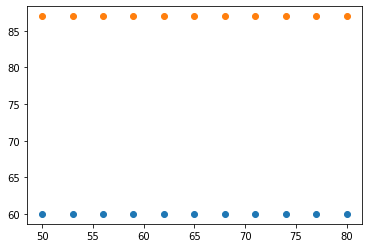

In [33]:
x3 = [50., 53., 56., 59., 62., 65., 68., 71., 74., 77., 80.]
y3 = [ 60.,  60.,  60.,  60.,  60.,  60.,  60.,  60.,  60.,  60.,  60.]

x4 = [50., 53., 56., 59., 62., 65., 68., 71., 74., 77., 80.]
y4 = [ 87.,  87.,  87.,  87.,  87.,  87.,  87.,  87.,  87.,  87.,  87.]

plt.scatter(x3, y3)
plt.scatter(x4, y4)
plt.show()

In [6]:
df_c

,0_Java,0_JavaScript,0_PHP,0_Python,0_Ruby
0,0,0,0,1,0
1,0,0,0,0,1
2,0,0,1,0,0
3,1,0,0,0,0
4,0,1,0,0,0


In [7]:
df_d

,0_Python,0_Ruby,0_PHP,0_Java,0_JavaScript
0,1,0,0,0,0
1,0,1,0,0,0
2,0,0,1,0,0
3,0,0,0,1,0
4,0,0,0,0,1


In [10]:
values

array(['Python', 'Ruby', 'PHP', 'Java', 'JavaScript'], dtype=object)